### Basic data analysis or exploratory data analysis (EDA)

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('./cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [4]:
# print the 5 records of the traiing dataset
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Handle the outliers

In [5]:
training_data = training_data.fillna(training_data.median())

In [6]:
training_data.isna().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

Applying log to outliers in parameters that outliers are dominant:
-monthlyincome
-numberoftime3059dayspastduenotworse
-numberoftime6089dayspastduenotworse
-numberoftimes90dayslate
-numberofopencreditlinesandloans
-numberofdependents

In [7]:
training_data.revolvingutilizationofunsecuredlines = np.log(training_data.revolvingutilizationofunsecuredlines+1)

In [8]:
training_data.age = np.log(training_data.age+1)

In [9]:
training_data.debtratio = np.log(training_data.debtratio+1)

In [10]:
training_data.monthlyincome = np.log(training_data.monthlyincome+1)

In [11]:
training_data.numberofopencreditlinesandloans = np.log(training_data.numberofopencreditlinesandloans+1)

In [12]:
training_data.numberoftime3059dayspastduenotworse = np.log(training_data.numberoftime3059dayspastduenotworse+1)

In [13]:
training_data.numberoftime6089dayspastduenotworse = np.log(training_data.numberoftime6089dayspastduenotworse+1)

In [14]:
training_data.numberoftimes90dayslate = np.log(training_data.numberoftimes90dayslate+1)

In [15]:
training_data.numberrealestateloansorlines = np.log(training_data.numberrealestateloansorlines+1)

In [16]:
training_data.numberofdependents = np.log(training_data.numberofdependents+1)

seriousdlqin2yrs                            Axes(0.125,0.77;0.352273x0.11)
revolvingutilizationofunsecuredlines     Axes(0.547727,0.77;0.352273x0.11)
age                                        Axes(0.125,0.638;0.352273x0.11)
numberoftime3059dayspastduenotworse     Axes(0.547727,0.638;0.352273x0.11)
debtratio                                  Axes(0.125,0.506;0.352273x0.11)
monthlyincome                           Axes(0.547727,0.506;0.352273x0.11)
numberofopencreditlinesandloans            Axes(0.125,0.374;0.352273x0.11)
numberoftimes90dayslate                 Axes(0.547727,0.374;0.352273x0.11)
numberrealestateloansorlines               Axes(0.125,0.242;0.352273x0.11)
numberoftime6089dayspastduenotworse     Axes(0.547727,0.242;0.352273x0.11)
numberofdependents                          Axes(0.125,0.11;0.352273x0.11)
dtype: object

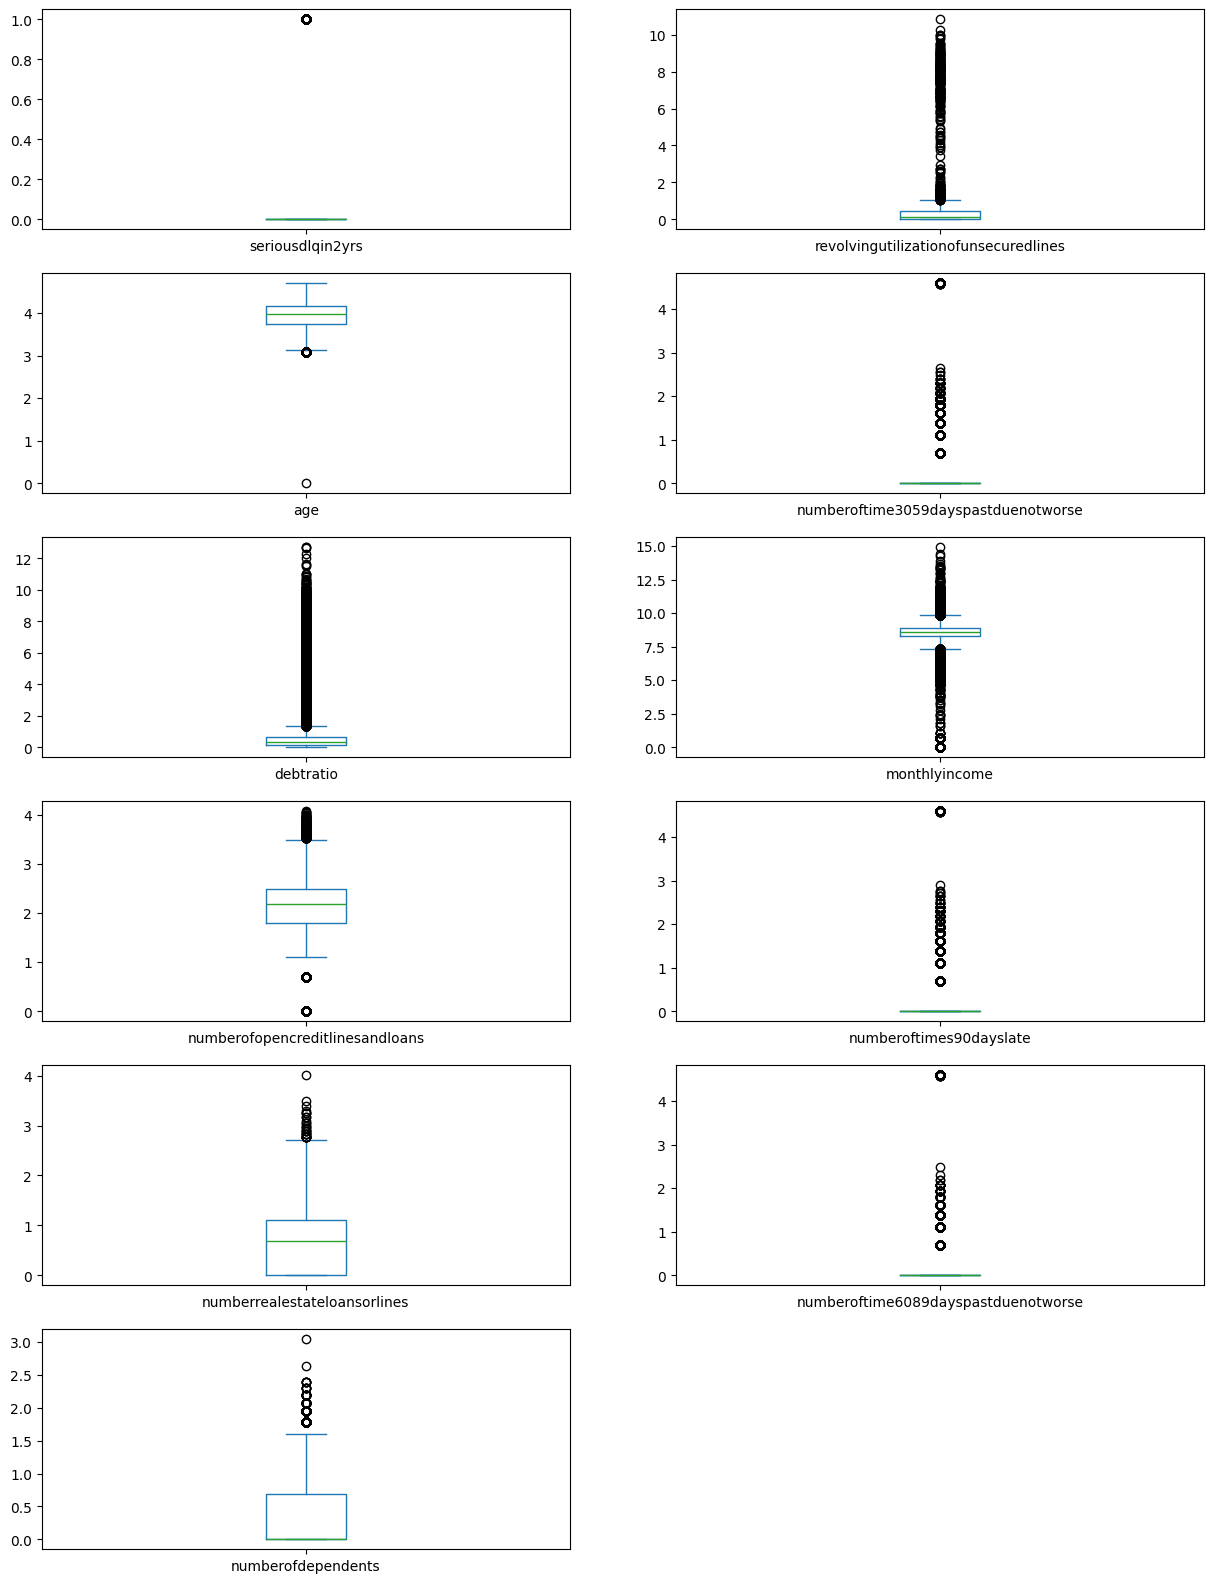

In [17]:
training_data.plot(kind="box",subplots=True,layout=(6,2),figsize=(15,20))

## Train and build baseline model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve
import lightgbm as lgb

In [19]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### KNN 

In [21]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [22]:
knMod.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
knMod.score(X_test, y_test)

0.9314933333333333

In [24]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]

In [25]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.738013625185863

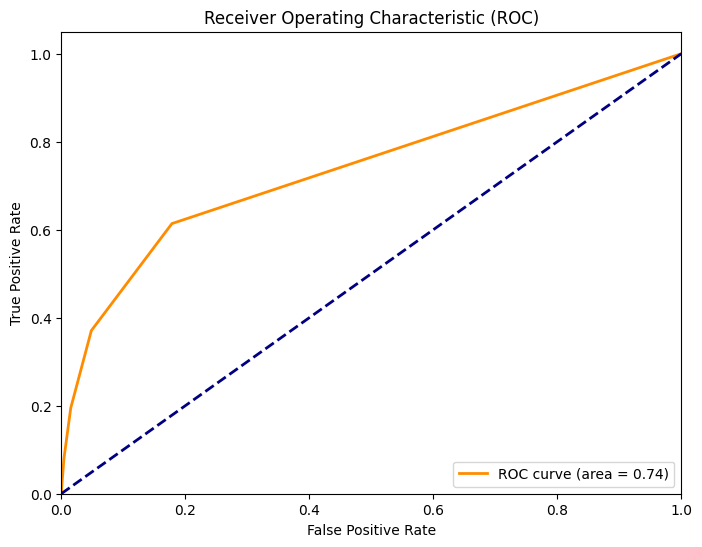

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

- The curve is above the diagonal line, which suggests that the classifier performs better than random chance. This is a good sign and indicates some ability to distinguish between the two classes.
- The curve approaches the top left corner but not very closely, which means that the classifier has a moderate true positive rate for lower false positive rates, but it doesn't achieve high true positive rates without also increasing the false positive rate significantly.

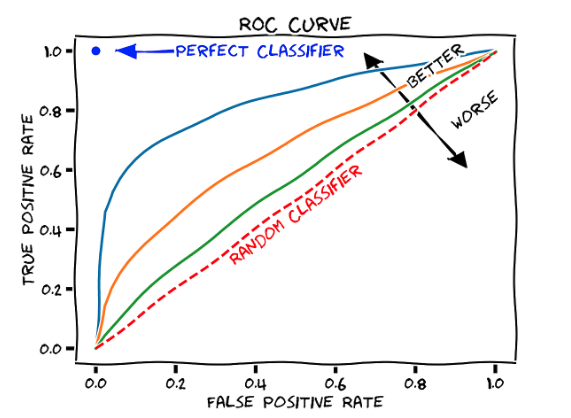

#### Logistic Regression

In [27]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [28]:
glmMod.fit(X_train, y_train)

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 6
iter   6  #CD cycles 1
iter   7  #CD cycles 34
iter   8  #CD cycles 15
iter   9  #CD cycles 9
iter  10  #CD cycles 2
iter  11  #CD cycles 3
iter  12  #CD cycles 1
iter  13  #CD cycles 67
iter  14  #CD cycles 12
iter  15  #CD cycles 11
iter  16  #CD cycles 8
iter  17  #CD cycles 3
iter  18  #CD cycles 5
iter  19  #CD cycles 2
iter  20  #CD cycles 4
iter  21  #CD cycles 3
iter  22  #CD cycles 6
iter  23  #CD cycles 2
iter  24  #CD cycles 1
iter  25  #CD cycles 272
iter  26  #CD cycles 4
iter  27  #CD cycles 16
iter  28  #CD cycles 14
iter  29  #CD cycles 2
iter  30  #CD cycles 6
iter  31  #CD cycles 7
iter  32  #CD cycles 3
iter  33  #CD cycles 3
iter  34  #CD cycles 7
iter  35  #CD cycles 9
iter  36  #CD cycles 7
iter  37  #CD cycles 8
iter  38  #CD cycles 7
iter  39  #CD cycles 3
iter  40  #CD cycles 3
iter  41  #CD cycles 5
iter  42  #CD cycles 2
iter  43  #CD 

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   verbose=2)

In [29]:
glmMod.score(X_test, y_test)

0.93488

In [30]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]

In [31]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8389863902876369

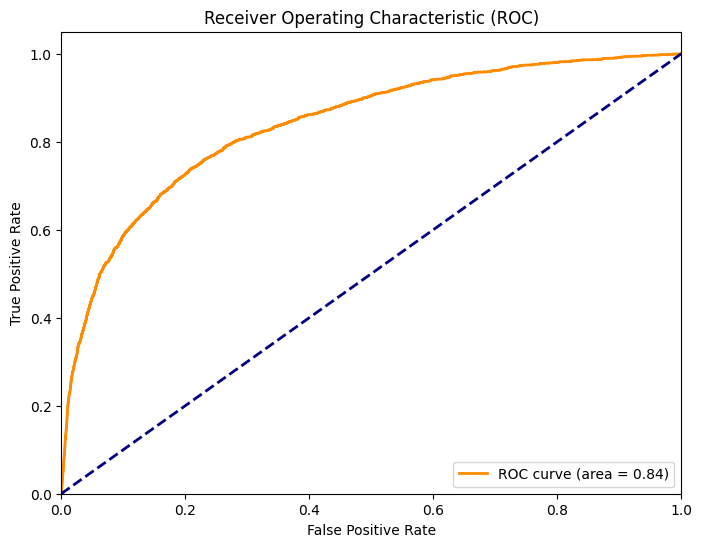

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

#### Adaboost Classifier

In [33]:
# Deleted base_estimator=None due to error 
adaMod = AdaBoostClassifier(n_estimators=200, learning_rate=1.0)

In [34]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [35]:
adaMod.score(X_test, y_test)

0.9362933333333333

In [36]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]

In [37]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.861972602494292

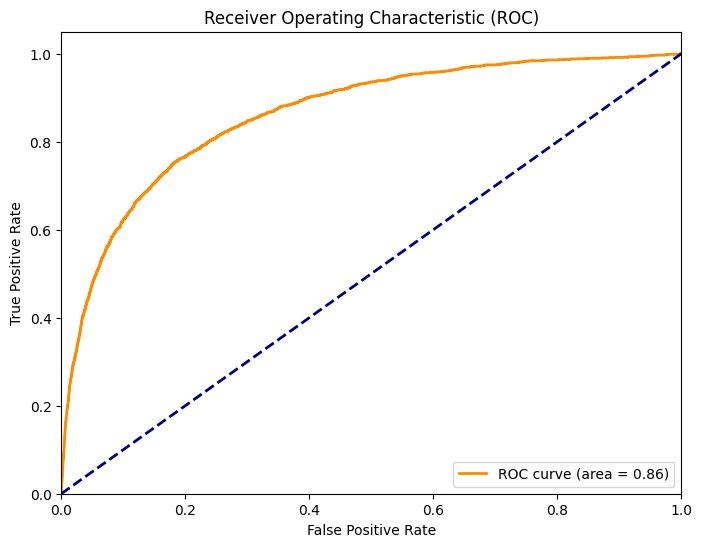

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

#### Gradientboosting Classifier

In [39]:
gbMod = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [40]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=200)

In [41]:
gbMod.score(X_test, y_test)

0.9367466666666666

In [42]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]

In [43]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8674309078818208

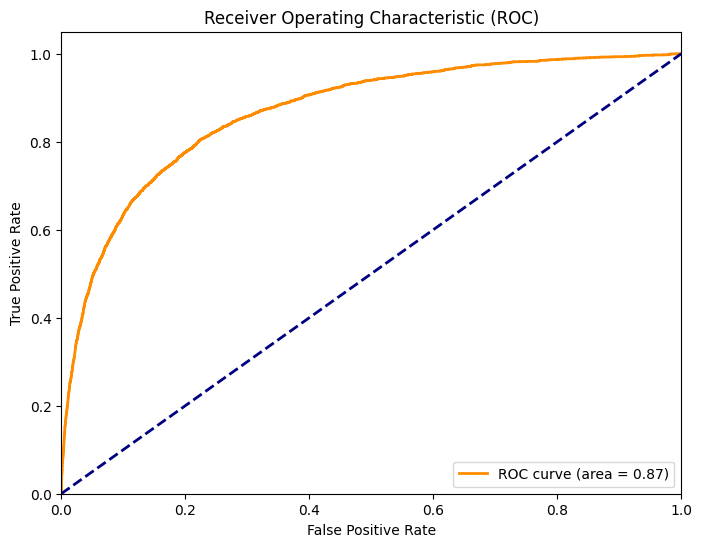

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

#### Light Gradient Boostin Machine(Newly added)

In [45]:
lgbmMod = lgb.LGBMClassifier(random_state=42, 
                                     num_leaves=31,
                                     max_depth=-1, 
                                     learning_rate=0.1, 
                                     n_estimators=100,
                                     min_child_samples=20)

In [46]:
lgbmMod.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 7498, number of negative: 105002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 112500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066649 -> initscore=-2.639343
[LightGBM] [Info] Start training from score -2.639343


LGBMClassifier(random_state=42)

In [47]:
lgbmMod.score(X_test, y_test)

0.9365866666666667

In [48]:
test_labels=lgbmMod.predict_proba(np.array(X_test.values))[:,1]

In [49]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8670010601609679

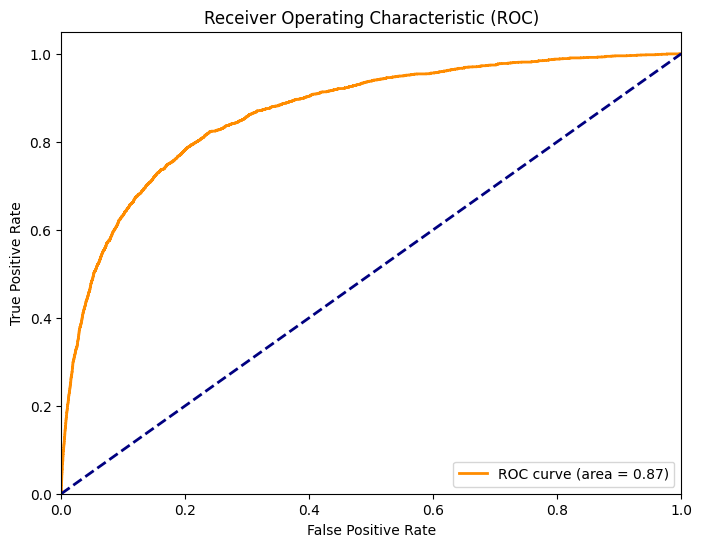

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

#### RandomForest Classifier

In [51]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [52]:
rfMod.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [53]:
rfMod.score(X_test, y_test)

0.93192

In [54]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]

In [55]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.7803581981769864

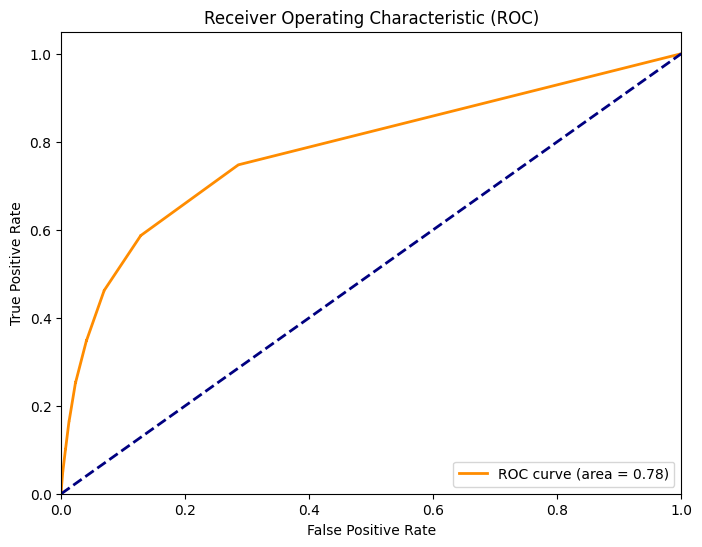

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

### Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [58]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, lgbmMod, rfMod], scr='roc_auc')
cvD

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 2
iter   7  #CD cycles 1
iter   8  #CD cycles 41
iter   9  #CD cycles 14
iter  10  #CD cycles 2
iter  11  #CD cycles 1
iter  12  #CD cycles 47
iter  13  #CD cycles 26
iter  14  #CD cycles 26
iter  15  #CD cycles 5
iter  16  #CD cycles 1
iter  17  #CD cycles 278
iter  18  #CD cycles 79
iter  19  #CD cycles 5
iter  20  #CD cycles 7
iter  21  #CD cycles 12
iter  22  #CD cycles 9
iter  23  #CD cycles 6
iter  24  #CD cycles 1
iter  25  #CD cycles 291
iter  26  #CD cycles 6
iter  27  #CD cycles 99
iter  28  #CD cycles 13
iter  29  #CD cycles 5
iter  30  #CD cycles 11
iter  31  #CD cycles 2
iter  32  #CD cycles 10
iter  33  #CD cycles 7
iter  34  #CD cycles 5
iter  35  #CD cycles 1
iter  36  #CD cycles 391
iter  37  #CD cycles 33
iter  38  #CD cycles 39
optimization finished, #iter = 38
Objective value = 24273.423809
#nonzeros/#features = 11/11
[Li

{'KNeighborsClassifier': [0.7361483884757583, 0.00407137049787425],
 'LogisticRegression': [0.8334133221912035, 0.0048725175249824774],
 'AdaBoostClassifier': [0.8597286287041795, 0.00248720078101711],
 'GradientBoostingClassifier': [0.865750926521326, 0.0034845903960859146],
 'LGBMClassifier': [0.8645875075233465, 0.0029623178103949203],
 'RandomForestClassifier': [0.7826295917423043, 0.00507621602598211]}

<Axes: >

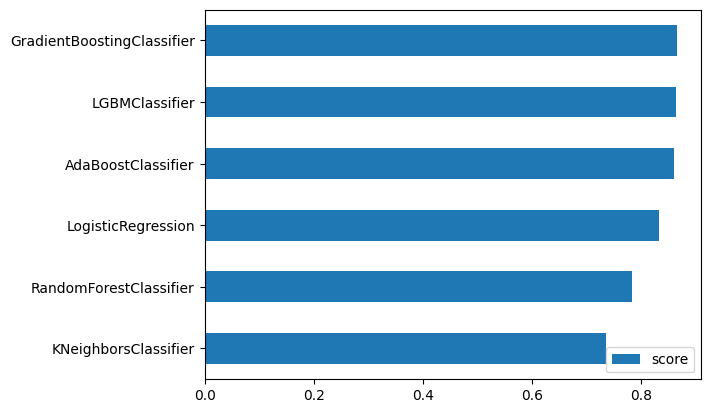

In [59]:
# Added Plot 
key = list(cvD.keys())
values = list([value[0] for value in cvD.values()])

df_temp = pd.DataFrame(values,key)
df_temp.columns = ['score']
df_temp_sorted = df_temp.sort_values(by='score', ascending=True)
df_temp_sorted.plot.barh()

### Hyper parameter optimization using Randomized search

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

#### AdaBoost

In [61]:
# added learning_rate 
adaHyperParams = {'n_estimators': [10,50,100,420],
                  'learning_rate' : [1, 0.1, 0.01]}

In [62]:
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2)

gridSearchAda.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..................learning_rate=1, n_estimators=420; total time=  16.9s
[CV] END ..................learning_rate=1, n_estimators=420; total time=  16.7s
[CV] END ..................learning_rate=1, n_estimators=420; total time=  16.8s
[CV] END ..................learning_rate=1, n_estimators=420; total time=  16.8s
[CV] END ..................learning_rate=1, n_estimators=420; total time=  16.8s
[CV] END ................learning_rate=0.1, n_estimators=420; total time=  16.7s
[CV] END ................learning_rate=0.1, n_estimators=420; total time=  16.8s
[CV] END ................learning_rate=0.1, n_estimators=420; total time=  16.5s
[CV] END ................learning_rate=0.1, n_estimators=420; total time=  16.7s
[CV] END ................learning_rate=0.1, n_estimators=420; total time=  17.3s
[CV] END ...................learning_rate=1, n_estimators=10; total time=   0.4s
[CV] END ...................learning_rate=1, n_es

RandomizedSearchCV(estimator=AdaBoostClassifier(n_estimators=200), n_iter=5,
                   param_distributions={'learning_rate': [1, 0.1, 0.01],
                                        'n_estimators': [10, 50, 100, 420]},
                   scoring='roc_auc', verbose=2)

In [63]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 420, 'learning_rate': 0.1}, 0.8597286066573926)

#### GradientBoosting

In [64]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [65]:
# gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
#                                    scoring='roc_auc', cv=None, verbose=2)

# gridSearchGB.fit(X_train, y_train)

In [66]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2)

gridSearchGB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....loss=exponential, max_depth=2, n_estimators=416; total time=  26.3s
[CV] END ....loss=exponential, max_depth=2, n_estimators=416; total time=  26.0s
[CV] END ....loss=exponential, max_depth=2, n_estimators=416; total time=  26.0s
[CV] END ....loss=exponential, max_depth=2, n_estimators=416; total time=  26.0s
[CV] END ....loss=exponential, max_depth=2, n_estimators=416; total time=  26.1s
[CV] END ....loss=exponential, max_depth=5, n_estimators=281; total time=  41.8s
[CV] END ....loss=exponential, max_depth=5, n_estimators=281; total time=  41.7s
[CV] END ....loss=exponential, max_depth=5, n_estimators=281; total time=  41.7s
[CV] END ....loss=exponential, max_depth=5, n_estimators=281; total time=  41.7s
[CV] END ....loss=exponential, max_depth=5, n_estimators=281; total time=  41.6s
[CV] END .......loss=deviance, max_depth=1, n_estimators=481; total time=   0.0s
[CV] END .......loss=deviance, max_depth=1, n_es

RandomizedSearchCV(estimator=GradientBoostingClassifier(loss='exponential',
                                                        n_estimators=200),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17399b8d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2a0983710>},
                   scoring='roc_auc', verbose=2)

In [67]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......loss=deviance, max_depth=8, n_estimators=290; total time=   0.0s
[CV] END .......loss=deviance, max_depth=8, n_estimators=290; total time=   0.0s
[CV] END .......loss=deviance, max_depth=8, n_estimators=290; total time=   0.0s
[CV] END .......loss=deviance, max_depth=8, n_estimators=290; total time=   0.0s
[CV] END .......loss=deviance, max_depth=8, n_estimators=290; total time=   0.0s
[CV] END .......loss=deviance, max_depth=2, n_estimators=147; total time=   0.0s
[CV] END .......loss=deviance, max_depth=2, n_estimators=147; total time=   0.0s
[CV] END .......loss=deviance, max_depth=2, n_estimators=147; total time=   0.0s
[CV] END .......loss=deviance, max_depth=2, n_estimators=147; total time=   0.0s
[CV] END .......loss=deviance, max_depth=2, n_estimators=147; total time=   0.0s
[CV] END .......loss=deviance, max_depth=8, n_estimators=328; total time=   0.0s
[CV] END .......loss=deviance, max_depth=8, n_es

In [68]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 3, 'n_estimators': 477},
 0.8615188182988014)

### Train models with help of new hyper parameter

In [69]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [70]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [71]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

In [72]:
cvDictbestpara

{'GradientBoostingClassifier': [0.864745956718638, 0.0035015807933402366],
 'AdaBoostClassifier': [0.8609765189028338, 0.003266441674816986]}

In [73]:
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]

In [74]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8668598757848955

In [75]:
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]

In [76]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8625036557274754

### Feature Transformation

In [77]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

In [78]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)

In [79]:
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [80]:
cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')

In [81]:
cvDictbestpara_transform

{'GradientBoostingClassifier': [0.8647566120814423, 0.003475351987067645],
 'AdaBoostClassifier': [0.8609765189028338, 0.003266441674816986]}

In [82]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)

In [83]:
X_test_transform

array([[0.02965102, 1.65240309, 0.52658903, ..., 0.52658903, 0.        ,
        0.52658903],
       [0.53138581, 1.52842695, 0.        , ..., 0.        , 0.        ,
        0.52658903],
       [0.13587831, 1.66329448, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.38552733, 1.57900914, 0.        , ..., 0.52658903, 0.        ,
        0.74127631],
       [0.12130998, 1.54519363, 0.        , ..., 0.52658903, 0.        ,
        0.86974169],
       [0.15116214, 1.60347857, 0.        , ..., 0.52658903, 0.        ,
        0.52658903]])

In [84]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [85]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8667103664848695

In [86]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [87]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8625036557274754

### Voting based ensamble model

In [88]:
# Feature transformed
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

In [89]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]

In [90]:
votingMod.score(X_test_transform, y_test)

0.9371733333333333

In [91]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8669186422827231

In [92]:
# Feature X transformed 
from sklearn.ensemble import VotingClassifier
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod_old = votingMod.fit(X_train, y_train)

In [93]:
test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]

In [94]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8671259340202723

#### Feature importance of final model

In [95]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs
features_label = training_data.columns[1:]
forest = RandomForestClassifier (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.193633
 2) age                            0.180566
 3) numberoftime3059dayspastduenotworse 0.146232
 4) debtratio                      0.127389
 5) monthlyincome                  0.091034
 6) numberofopencreditlinesandloans 0.088507
 7) numberoftimes90dayslate        0.049594
 8) numberrealestateloansorlines   0.047440
 9) numberoftime6089dayspastduenotworse 0.041825
10) numberofdependents             0.033779


In [96]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [97]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8667103664848695

In [98]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [99]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8625036557274754

### Voting based ensamble model

In [100]:
# Feature transformed
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

In [101]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]

In [102]:
votingMod.score(X_test_transform, y_test)

0.9371733333333333

In [103]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8668987009227636

In [104]:
# Feature X transformed 
from sklearn.ensemble import VotingClassifier
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod_old = votingMod.fit(X_train, y_train)

In [105]:
test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]

In [106]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8671027350813745

#### Feature importance of final model

In [107]:
features_label_1 = training_data.columns[1:]
importances_1 = bestGbModFitted.feature_importances_
indices = np. argsort(importances_1)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label_1[i],importances_1[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.459241
 2) age                            0.190310
 3) numberoftime3059dayspastduenotworse 0.104308
 4) debtratio                      0.098689
 5) monthlyincome                  0.057866
 6) numberofopencreditlinesandloans 0.027856
 7) numberoftimes90dayslate        0.024879
 8) numberrealestateloansorlines   0.018165
 9) numberoftime6089dayspastduenotworse 0.013871
10) numberofdependents             0.004814


In [108]:
features_label_2 = training_data.columns[1:]
importances_2 = bestAdaModFitted.feature_importances_
indices = np. argsort(importances_2)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label_2[i],importances_2[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.190476
 2) age                            0.142857
 3) numberoftime3059dayspastduenotworse 0.126190
 4) debtratio                      0.107143
 5) monthlyincome                  0.102381
 6) numberofopencreditlinesandloans 0.097619
 7) numberoftimes90dayslate        0.088095
 8) numberrealestateloansorlines   0.078571
 9) numberoftime6089dayspastduenotworse 0.059524
10) numberofdependents             0.007143


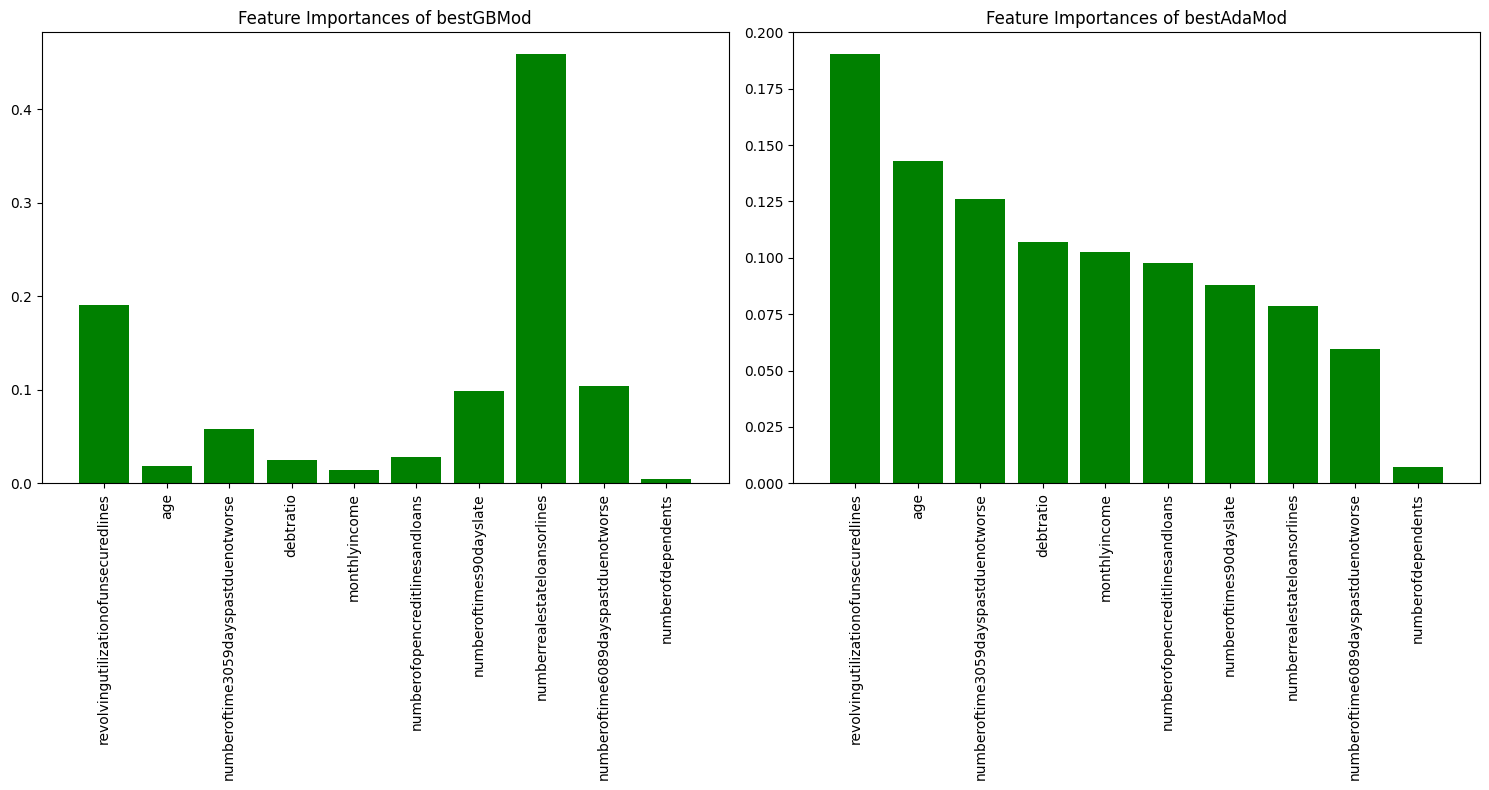

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))  # 1 row, 2 columns, and adjusting the figure size

# Plot for 'Feature Importances of bestGBMod'
ax[0].bar(range(X.shape[1]), importances_1[indices], color="green", align="center")
ax[0].set_xticks(range(X.shape[1]))
ax[0].set_xticklabels(features_label_1, rotation=90)
ax[0].set_xlim([-1, X.shape[1]])
ax[0].set_title('Feature Importances of bestGBMod')

# Plot for 'Feature Importances of bestAdaMod'
ax[1].bar(range(X.shape[1]), importances_2[indices], color="green", align="center")
ax[1].set_xticks(range(X.shape[1]))
ax[1].set_xticklabels(features_label_2, rotation=90)
ax[1].set_xlim([-1, X.shape[1]])
ax[1].set_title('Feature Importances of bestAdaMod')

plt.tight_layout()  # Adjust the layout to not overlap
plt.show()

### Testing on Real Test Dataset

In [110]:
# Read Training dataset as well as drop the index column
test_data = pd.read_csv('./cs-test.csv').drop('Unnamed: 0', axis = 1)
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test_data.columns)):
    cleancolumn.append(test_data.columns[i].replace('-', '').lower())
test_data.columns = cleancolumn

In [111]:
test_data.drop(['seriousdlqin2yrs'], axis=1, inplace=True)
test_data.fillna((training_data.median()), inplace=True)

In [112]:
test_labels_votingMod_old = votingMod_old.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [113]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod_old})

In [114]:
output.to_csv("./predictions.csv", index=False)

In [115]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# need to transfrom the test_data because we use model with transformed model 
transformer = FunctionTransformer(np.log1p)
test_data_temp = np.array(test_data)
test_data_transform = transformer.transform(test_data_temp)

In [116]:
test_labels_votingMod = votingMod.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [117]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod})

In [118]:
output.to_csv("./predictions_voting_Feature_transformation.csv", index=False)